In [236]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial.transform import Rotation as R


In [237]:
def generate_points(n_handle=10, n_head=100, seed=13):
    # x, y, z
    min_handle = np.array([-3, -1, -1])
    max_handle = np.array([1, 1, 1])

    min_head = np.array([1, -1, -2])
    max_head = np.array([2, 1, 2])

    np.random.seed(seed)
    handle_points = np.random.uniform(min_handle, max_handle,
                                      [n_handle, 3])
    head_points = np.random.uniform(min_head, max_head,
                                    [n_head, 3])

    return np.vstack([handle_points, head_points])

middle point
[-0.49789473 -0.02582573  0.0180522 ]
mean hammer
[ 1.26149006 -0.12669345 -0.08896331]


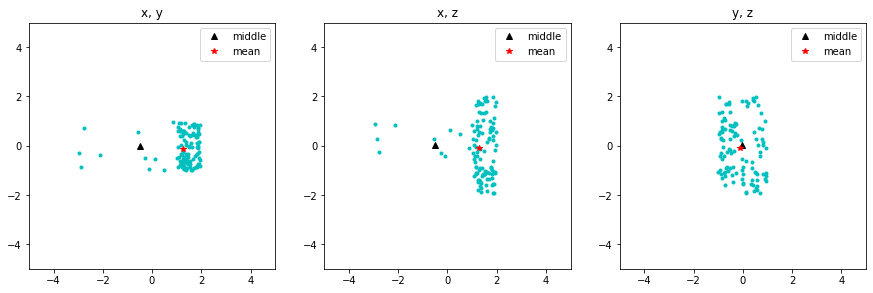

In [238]:
hammer = generate_points(10, 100)
min_hammer = np.min(hammer, axis=0)
max_hammer = np.max(hammer, axis=0)
mid_hammer = (max_hammer + min_hammer) * 0.5
mean_hammer = np.mean(hammer, axis=0)
print("middle point")
print(mid_hammer)
print("mean hammer")
print(mean_hammer)

fw = 5.
plot_lim = 5
order = [[0, 1, 'x, y'],
         [0, 2, 'x, z'],
         [1, 2, 'y, z']]

fig = plt.figure(figsize=(fw*3, fw*1))
for p in range(3):
    ax = plt.subplot(1, 3, p+1)
    ax.set_title(order[p][2])
    ax.plot(hammer[:, order[p][0]], hammer[:, order[p][1]], 'c.')
    ax.plot(mid_hammer[order[p][0]], mid_hammer[order[p][1]],
            'k^', label='middle')
    ax.plot(mean_hammer[order[p][0]], mean_hammer[order[p][1]],
            'r*', label='mean')
    ax.set_xlim(-plot_lim, plot_lim)
    ax.set_ylim(-plot_lim, plot_lim)
    ax.set_aspect('equal', 'box')
    ax.legend()
plt.show()

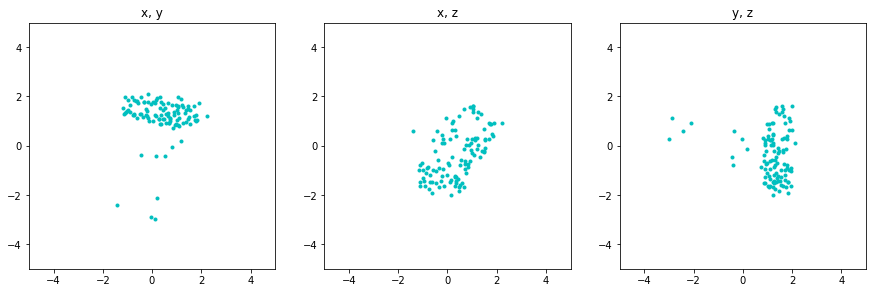

In [239]:
# ROTATE
r = R.from_euler('xyz', [30, 10, 75], degrees=True)
hammer_rotated = r.apply(hammer)

fig = plt.figure(figsize=(fw*3, fw*1))
for p in range(3):
    ax = plt.subplot(1, 3, p+1)
    ax.set_title(order[p][2])
    ax.plot(hammer_rotated[:, order[p][0]],
            hammer_rotated[:, order[p][1]], 'c.')
    ax.set_xlim(-plot_lim, plot_lim)
    ax.set_ylim(-plot_lim, plot_lim)
    ax.set_aspect('equal', 'box')

plt.show()

Means for the transformed 'hammer'
[1.37824291 2.15956114 0.6426862 ]
Middle point for the transformed 'hammer'
[1.40462536 0.55993566 0.81305418]


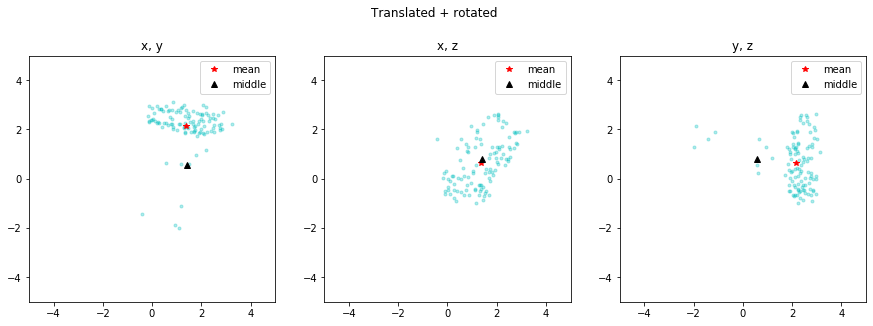

In [240]:
hammer_rot_trans = hammer_rotated + 1.0
print("Means for the transformed 'hammer'")
means_transformed = np.mean(hammer_rot_trans, axis=0)
print(means_transformed)
min_trans = np.min(hammer_rot_trans, axis=0)
max_trans = np.max(hammer_rot_trans, axis=0)
mid_trans = (max_trans + min_trans) * 0.5
print("Middle point for the transformed 'hammer'")
print(mid_trans)

fig = plt.figure(figsize=(fw*3, fw*1))
plt.suptitle("Translated + rotated")
for p in range(3):
    ax = plt.subplot(1, 3, p+1)
    ax.set_title(order[p][2])
    ax.plot(hammer_rot_trans[:, order[p][0]],
            hammer_rot_trans[:, order[p][1]],
            'c.', alpha=0.3)
    ax.plot(means_transformed[order[p][0]],
            means_transformed[order[p][1]],
            'r*', label='mean')
    ax.plot(mid_trans[order[p][0]],
            mid_trans[order[p][1]],
            'k^', label='middle')

    ax.set_xlim(-plot_lim, plot_lim)
    ax.set_ylim(-plot_lim, plot_lim)
    ax.set_aspect('equal', 'box')
    ax.legend()
plt.show()


Means for the transformed 'hammer'
[ 2.00754817e-17 -4.89192020e-16 -1.87223974e-16]
Middle point for the transformed 'hammer'
[1.40462536 0.55993566 0.81305418]


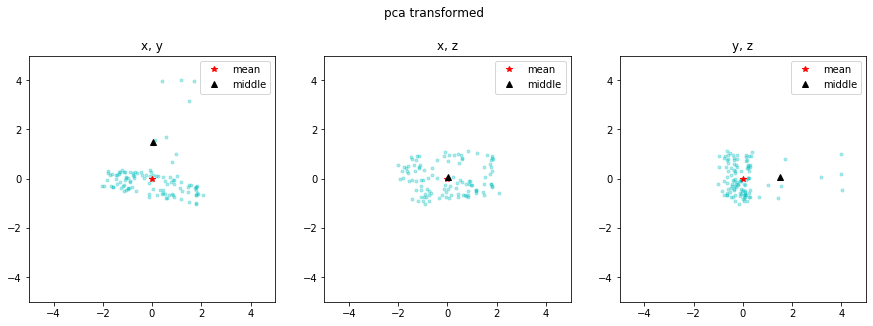

In [241]:

pca = PCA(3)
hammer_pca = pca.fit_transform(hammer_rot_trans)
print("Means for the transformed 'hammer'")
means_pca = np.mean(hammer_pca, axis=0)
print(means_pca)
min_pca = np.min(hammer_pca, axis=0)
max_pca = np.max(hammer_pca, axis=0)
mid_pca = (max_pca + min_pca) * 0.5
print("Middle point for the transformed 'hammer'")
print(mid_trans)

fig = plt.figure(figsize=(fw*3, fw*1))
plt.suptitle("pca transformed")
for p in range(3):
    ax = plt.subplot(1, 3, p+1)
    ax.set_title(order[p][2])
    ax.plot(hammer_pca[:, order[p][0]],
            hammer_pca[:, order[p][1]],
            'c.', alpha=0.3)
    ax.plot(means_pca[order[p][0]],
            means_pca[order[p][1]],
            'r*', label='mean')
    ax.plot(mid_pca[order[p][0]],
            mid_pca[order[p][1]],
            'k^', label='middle')

    ax.set_xlim(-plot_lim, plot_lim)
    ax.set_ylim(-plot_lim, plot_lim)
    ax.set_aspect('equal', 'box')
    ax.legend()

plt.show()


In [242]:
recons_means_pca = pca.inverse_transform(means_pca)
print("means from inverse PCA transform")
print(recons_means_pca)
print("means from original 'object'")
print(means_transformed)

recons_mid_pca = pca.inverse_transform(mid_pca)
print("\nmiddle from inverse PCA transform")
print(recons_mid_pca)
print("middle from original 'object'")
print(mid_trans)

means from inverse PCA transform
[1.37824291 2.15956114 0.6426862 ]
means from original 'object'
[1.37824291 2.15956114 0.6426862 ]

middle from inverse PCA transform
[0.86371458 0.74664585 0.709543  ]
middle from original 'object'
[1.40462536 0.55993566 0.81305418]


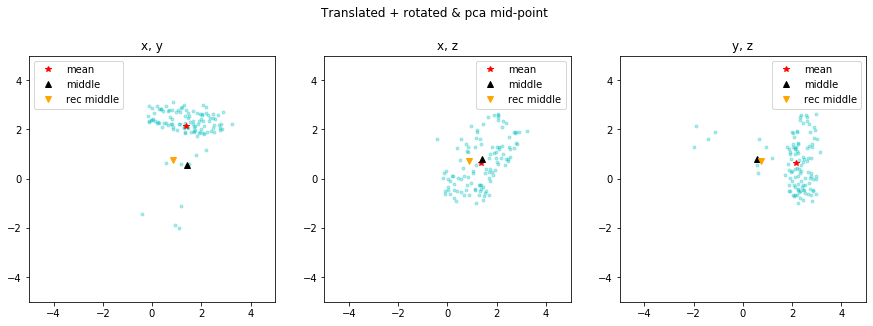

In [245]:
fig = plt.figure(figsize=(fw*3, fw*1))
plt.suptitle("Translated + rotated & pca mid-point")
for p in range(3):
    ax = plt.subplot(1, 3, p+1)
    ax.set_title(order[p][2])
    ax.plot(hammer_rot_trans[:, order[p][0]],
            hammer_rot_trans[:, order[p][1]],
            'c.', alpha=0.3)
    ax.plot(means_transformed[order[p][0]],
            means_transformed[order[p][1]],
            'r*', label='mean')
    ax.plot(mid_trans[order[p][0]],
            mid_trans[order[p][1]],
            'k^', label='middle')
    ax.plot(recons_mid_pca[order[p][0]],
            recons_mid_pca[order[p][1]],
            color='orange', marker='v', label='rec middle',
            linestyle='none')

    ax.set_xlim(-plot_lim, plot_lim)
    ax.set_ylim(-plot_lim, plot_lim)
    ax.set_aspect('equal', 'box')
    ax.legend()
plt.show()
